# Steps involved in NLP process

### Step 1: Sentence Segmentation. ...
### Step 2: Word Tokenization. ...
### Step 3: Predicting Parts of Speech for Each Token. ...
### Step 4: Text Lemmatization. ...
### Step 5: Identifying Stop Words. ...
### Step 6: Dependency Parsing. ...
### Step 6b: Finding Noun Phrases. ...
### Step 7: Named Entity Recognition (NER)

In [2]:
import pandas as pd
import numpy as np
import string
import nltk as nlp
import matplotlib.pyplot as plt
import re

In [3]:
df = pd.read_csv('spam.csv', encoding = "ISO-8859-1")
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df = df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis = 1)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
def no_punct(text):
    punct = "".join([char for char in text if char not in string.punctuation])
    return punct

df['v2_no_punct'] = df['v2'].apply(lambda x: no_punct(x))
df.head()

,v1,v2,v2_no_punct
0,ham,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say
4,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...


In [6]:
def tokenize(text):
    tokens = re.split('\W+', text)
    return tokens

df['v2_tokens'] = df['v2_no_punct'].apply(lambda x: tokenize(x.lower()))
df.head()

,v1,v2,v2_no_punct,v2_tokens
0,ham,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...,"[go, until, jurong, point, crazy, available, o..."
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f..."
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, t..."
4,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l..."


In [7]:
s_word = nlp.corpus.stopwords.words('english')
def stopword(text):
    r_stopword = [word for word in text if word not in s_word]
    return r_stopword

df['v2_stopwords'] = df['v2_tokens'].apply(lambda x: stopword(x))
df.head()

,v1,v2,v2_no_punct,v2_tokens,v2_stopwords
0,ham,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...,"[go, until, jurong, point, crazy, available, o...","[go, jurong, point, crazy, available, bugis, n..."
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin..."
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, t...","[u, dun, say, early, hor, u, c, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t..."


In [8]:
wn = nlp.WordNetLemmatizer()

def lemmatize(token):
    text = [wn.lemmatize(word) for word in token]
    return text

df['v2_lemmatized'] = df['v2_stopwords'].apply(lambda x: lemmatize(x))
df.head()

,v1,v2,v2_no_punct,v2_tokens,v2_stopwords,v2_lemmatized
0,ham,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...,"[go, until, jurong, point, crazy, available, o...","[go, jurong, point, crazy, available, bugis, n...","[go, jurong, point, crazy, available, bugis, n..."
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin...","[free, entry, 2, wkly, comp, win, fa, cup, fin..."
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, t...","[u, dun, say, early, hor, u, c, already, say]","[u, dun, say, early, hor, u, c, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t...","[nah, dont, think, go, usf, life, around, though]"


In [9]:
from sklearn.feature_extraction.text import CountVectorizer

In [10]:
ps = nlp.PorterStemmer()

def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    
    tokens = re.split('\W+', text)
    
    text = [ps.stem(word) for word in tokens if word not in s_word]
    
    return text

In [11]:
count_vect = CountVectorizer(analyzer = clean_text)
X_count = count_vect.fit_transform(df['v2'])
print(X_count.shape)
print(count_vect.get_feature_names())

(5572, 8060)
['', '0', '008704050406', '0089mi', '0121', '01223585236', '01223585334', '0125698789', '02', '020603', '0207', '02070836089', '02072069400', '02073162414', '02085076972', '020903', '021', '050703', '0578', '06', '060505', '061104', '07008009200', '07046744435', '07090201529', '07090298926', '07099833605', '071104', '07123456789', '0721072', '07732584351', '07734396839', '07742676969', '07753741225', '0776xxxxxxx', '07786200117', '077xxx', '078', '07801543489', '07808', '07808247860', '07808726822', '07815296484', '07821230901', '0784987', '0789xxxxxxx', '0794674629107880867867', '0796xxxxxx', '07973788240', '07xxxxxxxxx', '0800', '08000407165', '08000776320', '08000839402', '08000930705', '08000938767', '08001950382', '08002888812', '08002986030', '08002986906', '08002988890', '08006344447', '0808', '08081263000', '08081560665', '0825', '0844', '08448350055', '08448714184', '0845', '08450542832', '08452810071', '08452810073', '08452810075over18', '0870', '08700621170150p'

In [12]:
ngram_vect = CountVectorizer(ngram_range = (2,2), analyzer = clean_text)
X_count = ngram_vect.fit_transform(df['v2'])
print(X_count.shape)
print(ngram_vect.get_feature_names())

(5572, 8060)
['', '0', '008704050406', '0089mi', '0121', '01223585236', '01223585334', '0125698789', '02', '020603', '0207', '02070836089', '02072069400', '02073162414', '02085076972', '020903', '021', '050703', '0578', '06', '060505', '061104', '07008009200', '07046744435', '07090201529', '07090298926', '07099833605', '071104', '07123456789', '0721072', '07732584351', '07734396839', '07742676969', '07753741225', '0776xxxxxxx', '07786200117', '077xxx', '078', '07801543489', '07808', '07808247860', '07808726822', '07815296484', '07821230901', '0784987', '0789xxxxxxx', '0794674629107880867867', '0796xxxxxx', '07973788240', '07xxxxxxxxx', '0800', '08000407165', '08000776320', '08000839402', '08000930705', '08000938767', '08001950382', '08002888812', '08002986030', '08002986906', '08002988890', '08006344447', '0808', '08081263000', '08081560665', '0825', '0844', '08448350055', '08448714184', '0845', '08450542832', '08452810071', '08452810073', '08452810075over18', '0870', '08700621170150p'

In [18]:
df['text_len'] = df['v2'].apply(lambda x: len(x) - x.count(" "))

In [15]:
def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")),3)*100

In [17]:
df['punct_%'] = df['v2'].apply(lambda x: count_punct(x))

In [19]:
df.head()

,v1,v2,v2_no_punct,v2_tokens,v2_stopwords,v2_lemmatized,text_len,punct_%
0,ham,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...,"[go, until, jurong, point, crazy, available, o...","[go, jurong, point, crazy, available, bugis, n...","[go, jurong, point, crazy, available, bugis, n...",92,9.8
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]",24,25.0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin...","[free, entry, 2, wkly, comp, win, fa, cup, fin...",128,4.7
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, t...","[u, dun, say, early, hor, u, c, already, say]","[u, dun, say, early, hor, u, c, already, say]",39,15.4
4,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t...","[nah, dont, think, go, usf, life, around, though]",49,4.1


C:\Users\harsh\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\harsh\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  after removing the cwd from sys.path.


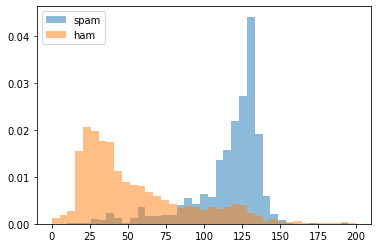

In [28]:
bins = np.linspace(0,200,40)

plt.hist(df[df['v1'] == 'spam']['text_len'], bins, alpha = 0.5, normed = True, label = 'spam')
plt.hist(df[df['v1'] == 'ham']['text_len'], bins, alpha = 0.5, normed = True, label = 'ham')
plt.legend(loc = 'upper left')
plt.show()

### as it can be seen in the above histogram, the spam mails contains more words then ham mails. So, it can be consider a good way to classify between them

C:\Users\harsh\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\harsh\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  after removing the cwd from sys.path.


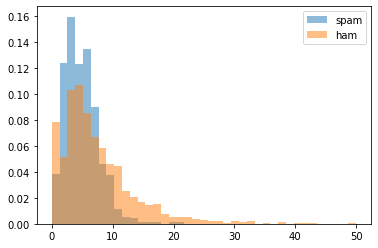

In [32]:
bins = np.linspace(0,50,40)

plt.hist(df[df['v1']=='spam']['punct_%'], bins, alpha = 0.5, normed = True, label = 'spam')
plt.hist(df[df['v1']=='ham']['punct_%'], bins, alpha = 0.5, normed = True, label = 'ham')
plt.legend(loc = 'upper right')
plt.show()

### as it can be seen in the above histogram, there is not much difference in the percentage of punctuation present in the spam mails and ham mails.

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [38]:
rf = RandomForestClassifier()
params = {'n_estimators' : [10,150,300],'max_depth' : [30,60,90,None]}

gdc = GridSearchCV(rf, params, cv = 5, n_jobs = -1)
gdc_fit = gdc.fit(X_count, df['v1'])
pd.DataFrame(gdc_fit.cv_results_).sort_values('mean_test_score', ascending = False).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
3,0.363514,0.007146,0.007990,7.168434e-07,60,10,"{'max_depth': 60, 'n_estimators': 10}",0.974888,0.974888,0.974865,0.968582,0.970377,0.972720,0.002706,1
11,17.275613,2.523634,0.170214,2.834680e-02,None,300,"{'max_depth': None, 'n_estimators': 300}",0.973991,0.971300,0.976661,0.968582,0.972172,0.972541,0.002699,2
8,16.530363,0.024756,0.173409,2.006506e-03,90,300,"{'max_depth': 90, 'n_estimators': 300}",0.975785,0.971300,0.974865,0.969479,0.971275,0.972541,0.002385,3
6,0.478561,0.002989,0.007990,8.064048e-07,90,10,"{'max_depth': 90, 'n_estimators': 10}",0.976682,0.972197,0.975763,0.970377,0.964991,0.972002,0.004192,4
10,9.601737,0.111759,0.099069,2.988840e-03,None,150,"{'max_depth': None, 'n_estimators': 150}",0.976682,0.969507,0.971275,0.967684,0.973968,0.971823,0.003194,5
